# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


**Draw a dispersion diagram (scatter plot) for the data.**

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

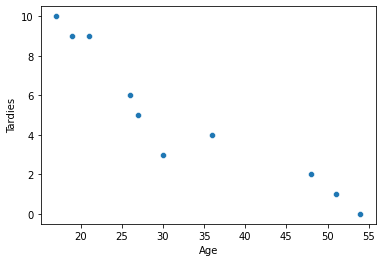

In [3]:
# Your code here
sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])

**Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?**

There is a negative correlation: as younger you are, more times you arrive late.

**Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.**

$$Cov (X, Y) = (E(X * Y) – E(X)) * E(Y)$$

In [35]:
# Your code here.
cov_students = student_data[["Tardies", "Age"]].cov()
cov_students

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [36]:
correlation_students = (student_data[["Tardies", "Age"]].corr(method = 'pearson'))
correlation_students

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


**Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.**

$$Y = m * X + n$$

In [5]:
# Your code here.
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [6]:
student_data.head()


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


In [21]:
# Your code here.

lr.fit(
    # X = data[["hours", "age", "n_bedrooms"]],
    X = student_data[["Tardies"]],
    y = student_data.Age
)
lr.coef_


array([-3.63241807])

The value of lr.coef_ represents the value of la peendiente de la regresión (m).

In [23]:
optimal_m = lr.coef_[0]
optimal_m

-3.632418069087687

In [24]:
optimal_n = lr.intercept_
optimal_n

50.69884853852967

In [29]:
student_data["best_prediction"] = (student_data.Tardies * optimal_m + optimal_n).round(2)
student_data["best_prediction_error"] = (student_data.best_prediction - student_data.Tardies).abs()
student_data.head()

,Age,Tardies,best_prediction,best_prediction_error
0,17,10,14.37,4.37
1,51,1,47.07,46.07
2,27,5,32.54,27.54
3,21,9,18.01,9.01
4,36,4,36.17,32.17


In [30]:
student_data.best_prediction_error.mean()


28.0

**Plot your regression model on your scatter plot.**

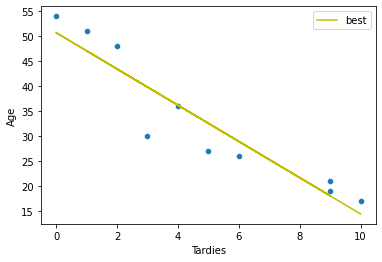

In [33]:
fig, ax = plt.subplots()
sns.scatterplot(x = student_data["Tardies"], y=student_data["Age"])
plt.plot(student_data.Tardies, student_data.best_prediction, color = 'y', label='best')

plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [37]:
# Your response here. 
results = smf.ols('Tardies ~ Age', data = student_data).fit()
results.summary()


/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.57e-05
Time:                        21:40:51   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.columns = vehicles.columns.str.replace(" ", "")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [43]:
# Your response here. 
vehicles.corr().loc[['CO2EmissionGrams/Mile'], ['Year', 'Cylinders', 'FuelBarrels/Year', 'CombinedMPG', 'FuelCost/Year']]

,Year,Cylinders,FuelBarrels/Year,CombinedMPG,FuelCost/Year
CO2EmissionGrams/Mile,-0.2223,0.752393,0.986189,-0.926229,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
# Your response here. 

x = vehicles[['Cylinders', 'FuelBarrels/Year', 'CombinedMPG', 'FuelCost/Year']]
y = vehicles['CO2EmissionGrams/Mile']

In [45]:
lr2 = LinearRegression()

lr2.fit( X = x, 
        y = y)
beta_1_1 = lr2.coef_[0] #To extract from the regression the slope of our model
beta_0_1 = lr2.intercept_ #To obtain the intercept of our linear regression

In [46]:
print(f"Intercept:{beta_1_1}")        
print(f"Coef: {beta_0_1}")

Intercept:1.0448363335225075
Coef: 131.1563247541892


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [54]:
# Your response here. 

results2 = smf.ols('y ~ x', data = vehicles).fit()
results2.summary(xname=['Intercept','Cylinders', 'FuelBarrels/Year', 'CombinedMPG', 'FuelCost/Year'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.470e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:46:39   Log-Likelihood:            -1.5226e+05
No. Observations:               35952   AIC:                         3.045e+05
Df Residuals:                   35947   BIC:                         3.046e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders            1.0448      0.080     12.993      0.000       0.887       1.202
FuelBarrels/Year    19.6271      0.060    329.809      0.000      19.510      19.744
CombinedMPG         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
FuelCost/Year        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
# Your code here. 

data_attendee = pd.DataFrame({"X": [1,3,4,6,8,9,11,14], 
                    "Y": [1,2,4,4,5,7,8,13]})
data_attendee

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

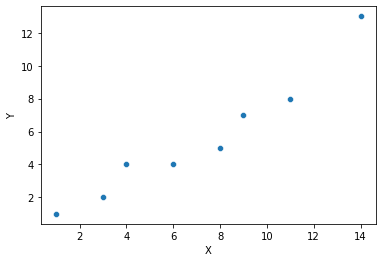

In [56]:
# Your code here.
sns.scatterplot(data_attendee.X, data_attendee.Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [57]:
# Your response here. 
correlation3 = (data_attendee[["X", "Y"]].corr(method = 'pearson'))
correlation3

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [18]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here. 